# Forside

**Kursus:** SWMAL-01 F24

**Opgaveafleveringsnavn:** Assignment 01

**Dato:** 14/2-24

**SWMAL Gruppe Nummer:** 20 

| Studienummer | Navn            |
|---------------|------------------|
| 201905440 | Marius Skjold Bjerg |
| 202105970 | Lasse Jensen |
| 202106020 | Victoria Raunholt Egholm |
| 202100350 | Thomas Kaae | 

_This notebook consists of five combined exercises from L01 and L02, which is required for assignment O1._


## L01 - Intro

_Below code is the code used to generate some of the figures in chapter 1._

Afterwards a list of questions will be answered.

### Setup

In [152]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


In [153]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


In [154]:
import os
datapath = os.path.join("datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
# (command 'dir' for windows, 'ls' for Linux or Macs)
#

! dir

print("\nOK")

 Volume in drive C has no label.
 Volume Serial Number is D648-AE69

 Directory of c:\Users\Bruger\Documents\GitHub\6-Semester\MAL\L01

02/14/2024  10:01 AM    <DIR>          .
02/14/2024  10:01 AM    <DIR>          ..
01/30/2024  01:28 PM    <DIR>          .ipynb_checkpoints
02/14/2024  10:45 AM            56,735 Combined final assignment.ipynb
02/14/2024  08:22 AM    <DIR>          data
01/30/2024  01:14 PM    <DIR>          datasets
02/08/2024  12:49 PM    <DIR>          extraUtils
02/08/2024  11:59 AM           105,669 intro.ipynb
02/08/2024  12:45 PM           246,708 intro_assignment.ipynb
02/08/2024  12:48 PM    <DIR>          libitmal
02/02/2024  01:44 PM            12,986 modules_and_classes.ipynb
02/08/2024  12:47 PM             6,066 modules_and_classes_assignment.ipynb
               5 File(s)        428,164 bytes
               7 Dir(s)  37,887,623,168 bytes free

OK


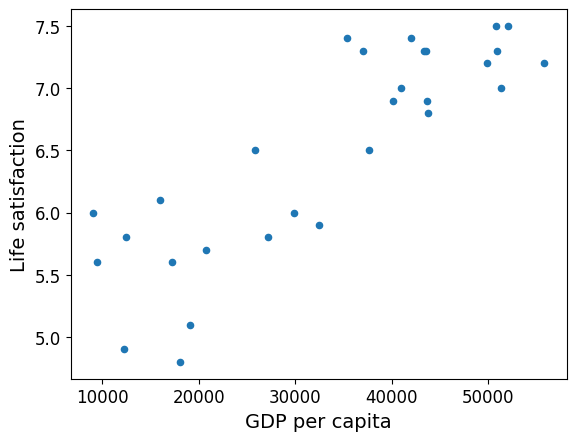

[[5.96242338]]
OK


In [155]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

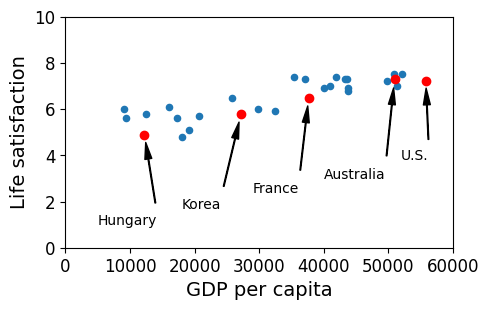

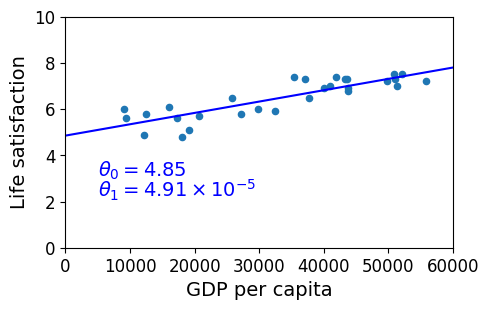

OK


In [156]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

### Qa) The $\theta$ parameters and the $R^2$ Score
 
The $\theta$ parameters, also refered to as weights or coefficients, can be adjusted during training to optimize the performance and acurracy of a certain linear regression model. 

Extrating the $\theta_0$ and $\theta_1$ coefficients can be done by using the below python attributes:

In [157]:
theta_0 = model.intercept_
theta_1 = model.coef_[0]

print("Theta_0 (Intercept):", theta_0)
print("Theta_1 (Coefficient):", theta_1)

Theta_0 (Intercept): [4.8530528]
Theta_1 (Coefficient): [4.91154459e-05]


 Another important variable is the $R^2$ score. 

The $R^2$ measures the goodness of fit of the model itself. The minimum and maximum values range from 0 to 1, where the below list describes each outcome:

- A value of 1: Considered a perfect fit, where the model accurately predicts the dependent variable based on the independent variables (Explains all the variance).
- A value of 0: The opposite of a perfect fit. This score indicates that the model's prediction is entirely wrong and provides no explanation.

While it is desirable to achieve a score of 1, it's important to note that such a score is highly unlikely as it's almost impossible to create a model that makes a perfect fit to real-world data.

Therefore, it is preferable to find a value close to 1, which, as explained, indicates a better fit.

In the assignment, the below calculation extracts the desirable score of 0.734.


In [158]:
score = model.score(X, y) 
print("Score:", score)

Score: 0.7344414355437031


### Qb) Using k-Nearest Neighbors

Instead of using linear regression, it will now be a k-nearest neighbour algorithm, here with k=3.

In [159]:
sample_data

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [160]:
# Preprocessed data
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


X.shape= (29, 1)
y.shape= (29, 1)


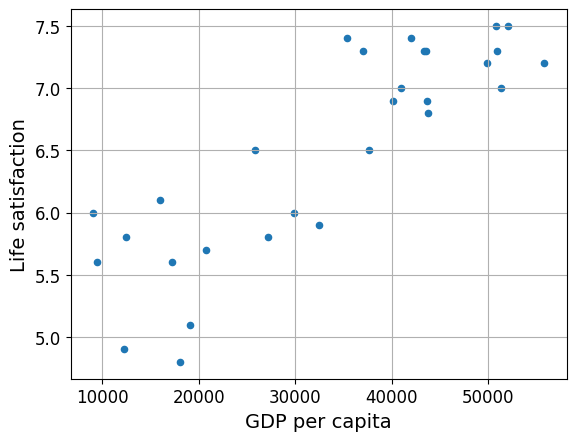

KNN prediction:  [[5.76666667]]
Linear regression prediction:  [[5.96242338]]
KKN score:  0.8525732853499179
Linear score:  0.7344414355437031


In [161]:
from sklearn.neighbors import KNeighborsRegressor

# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.grid(True)
plt.show()

# Select and train a model
knn = KNeighborsRegressor(n_neighbors=3)

# Train the new model
knn.fit(X, y) 


# Predictions for Cyprus 
print("KNN prediction: ", knn.predict(X_new))  
print("Linear regression prediction: ", lin1.predict(X_new))  

# Evaluating the models 
print("KKN score: ", knn.score(X, y))
print("Linear score: ", lin1.score(X, y))





As seen in the calculations above, the KNN prediction for Cyprus is 5.77, which is a bit less than the linear prediction of 5.96. 

KNN uses the score method of the coefficient of determination ($R^2$), as does the linear regression model. This means they are able to be compared, since they use the same scoring methods. 


The model used here is the "Regression based on k-nearest neighbors" (URL: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)








### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

When the k-nearest neighbor algorithm is set with a single neighbor (k_neighbor=1), it operates by directly connecting points, 1 at a time, resulting in a seemingly perfect fit. However, this perfect score can be misleading because the model overlooks outliers and fails to consider the broader pattern in the data. 

Conversely, when the algorithm considers more neighbors, such as k_neighbor=3, it attempts to incorporate multiple points, leading to a more generalized understanding of the data but sacrificing the perfect fit. 

So while a score of 1 may appear optimal, it actually indicates limitations in the model's approach, especially in scenarios where k_neighbor=1. This shows the importance of considering the trade-offs between model simplicity and generalization, as a perfect score with k_neighbor=1 does not necessarily imply the perfect model for the assignment.


1.0
0.7668672587435799


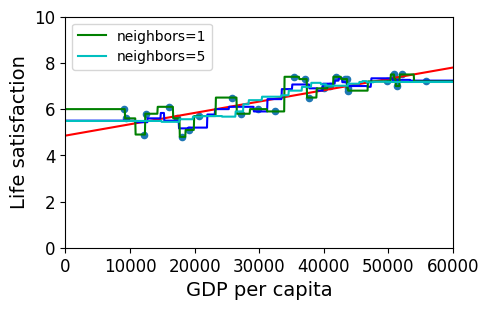

In [164]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = lin1.predict(M)
y_pred_knn = knn.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
 
# Model with 1 neighbor
knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(X, y) 
y_pred_knn1 = knn1.predict(M)    
plt.plot(m, y_pred_knn1, "g", label="neighbors=1")
print(knn1.score(X, y))

# Model with 8 neighbors
knn8 = KNeighborsRegressor(n_neighbors=8)
knn8.fit(X, y) 
y_pred_knn8 = knn8.predict(M)    
plt.plot(m, y_pred_knn8, "c", label="neighbors=5")
print(knn8.score(X, y))
plt.legend()


### Qd) Trying out a Neural Network

Let us then try a Neural Network on the data, using the fit-predict interface allows us to replug a new model into our existing code.

There are a number of different NN's available, let's just hook into Scikit-learns Multi-Layer Perceptron for regression, that is an 'MLPRegressor'. 

Now, the data-set for training the MLP is really not well scaled, so we need to tweak a lot of parameters in the MLP just to get it to produce some sensible output: with out preprocessing and scaling of the input data, `X`, the MLP is really a bad choice of model for the job since it so easily produces garbage output. 

Try training the `mlp` regression model below, predict the value for Cyprus, and find the `score` value for the training set...just as we did for the linear and KNN models.

Can the `MLPRegressor` score function be compared with the linear and KNN-scores?

In [ ]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

print(mlp.score(X, y))

### Try training the `mlp` regression model below, predict the value for Cyprus, and find the `score` value for the training set...just as we did for the linear and KNN models.

We have trained the mlp model, which changes each time the code is run because it's trained by a neural network now.
The neural network stops the training when it doesn't improve more than tol=0.000010 for 10 consecutive epochs.


### Can the `MLPRegressor` score function be compared with the linear and KNN-scores?
They can be compared since the score function is implemented in the same way. The result is way different from the score results of the linear and knn scores, which in this case means that the mlp model is worse at the prediction since the result (R^2) is negative. This means that the predicted values are performing worse than if you where to take the average value of the data as a prediction. (Læs lige op på det her?)


## L01 - Modules and Packages in Python

#### Qa) Load and test the `libitmal` module

Here, we import the libitmal module from utils, which was given in the assignment. We print its directory and its content, and lastly call its TestAll() method.

In [ ]:
import numpy as np
from libitmal import utils as itmalutils

print(dir(itmalutils))
print(itmalutils.__file__)

itmalutils.TestAll()

#### Qb) Create your own module, with some functions, and test it

Here we will import our own module named `extraUtils`. The module is imported from `coolModule`, where its functions now becomes available.

In this example, the `printNogetSejt()` is used to print a predfined text along with a given parameter string

In [ ]:
from extraUtils import coolModule as module

module.printNogetSejt("Thomas")

print(module.__file__)

#### Qc) How do you 'recompile' a module?

When changing the module code, Jupyter will keep running on the old module. How do you force the Jupyter notebook to re-load the module changes? 

You can force a reload of a module by using the `reload()` function from the `importlib` module.

In [ ]:
from importlib import reload
from extraUtils import coolModule as module   

reload(module)

It is also possible to automatically reload modules before executing code by using magic commands such as `%load_ext` and `%autoreload`

Source: [LINK](https://saturncloud.io/blog/jupyter-notebook-reload-module-a-comprehensive-guide/)

In [ ]:
%load_ext autoreload
%autoreload 2

#### Qe) Extend the class with some public and private functions and member variables 


Below, the class MyClass has been defined with both a private and a public function. 

Private funtions are defined by the two prefixed underscores (__), while member variables are defined by the "self." annotation. This self in python classes represents an instance of the class, therefor making it possible to access methods and attributes inside the class itself. 

In [ ]:
class MyClass:
    # Public function 
    def myfun(self):
        # Member variable 
        self.myvar = "blah"
        print(f"This is a message inside the class, myvar={self.myvar}.")
        
        # Private function 
    def __private_function(self):
        self.asdf = "asdf"
        print(f"This is a private function, {self.asdf}.")
        
    def something():
        print("Something")
        

Now an instance of the class is created. 

In [ ]:
myObjectx = MyClass()

When trying to call a function with the self parameter missing, it throws an error, because the program is passing it an instance of a class, but it doesn't take one. 

In [ ]:
try:
    myObjectx.something()
except:
    print("Self should be added to the implementation of something() if you want to call it this way")

When trying to call the private function, it fails because there is no function available called `__private_function()` 

In [ ]:
try:
    myObjectx.__private_function() 
except:
    print("No function called __private_function()")

If one wants to use a method with a self parameter, one needs to call it with the class directly and not an instance of the class. 

In [ ]:
MyClass.something() 

#### Qf) Extend the class with a Constructor


Below is shown how to define a constructor in a Python class, namely the `\_\_init\_\_` function. 
This function will be called every time a class is instantiated. 



In [ ]:
class myClass:
    def __init__(self):
        self.att1 = 2
        self.att2 = 3
        self.att3 = 4
        

As well as a constructor, it is also possible to make a destructor in a Python class. Below it is shown how this `\_\_del\_\_` function is defined in a class. 


The destructor function is not necessary in Python, since the language has garbage collection which handles the memory management automatically. 
So a detructor is not strictly necessary, except if you want to handle the memory management yourself.




In [ ]:
class myClass: 
    def __del__(self):
        print("The object has been deleted!")

By calling the destructor on an instance of the class, it will delete the object. 

In [ ]:
myobejctx = myClass() 
del myobejctx

#### Qg) Extend the class with a to-string function


 
In order to print an object in python, one needs to add the method `__str__(self)` to the class.
This method will be called, when the program is trying to print the object. 

There's one more way to print out and object in python, and that is with the `__repr__(self)` method.
They serve different purposes, `__str__(self)` is suppose to return an informal and userfriendly string representation of an object, and `__repr__(self)` is used more for debugging and a formel way of representing the object as a string.

If `__str__(self)` is defined in the class, it will not use `__repr__(self)`

In [ ]:
class myClass:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def __str__(self):
        return(f"My objects has a: {self.a} and b: {self.b}")
    
    def __repr__(self):
        return((f"MyClass({self.a, self.b})"))
        

someClass = myClass(42, 43)
print(someClass)

In [ ]:
class myClass:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def __repr__(self):
        return((f"MyClass({self.a, self.b})"))
        

someClass = myClass(42, 43)
print(someClass)

## L02 - Cost function

#### Qa) Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.

Using numpy the design matrix is being constructed

In [ ]:
import numpy as np

y = np.array([1,2,3,4]) 

x1 = np.array([1,2,3])
x2 = np.array([4,2,1])
x3 = np.array([3,8,5])
x4 = np.array([-9,-1,0])

X = np.array([x1, x2, x3, x4])

print(X)

#### Qb) Implement the L1 and L2 norms for vectors in python.

The norm functions `L1` and `L2` are being implemented, where we assert and validate the output of the function. The functions will be used later in the assignment.

In [ ]:
import math

def checkInputIsOneDimensional(x):
    assert x.shape[0]>=0 
    if not x.ndim==1:
        raise ValueError
    
def checkInputSameShape(y_pred, y_true):
    assert y_pred.shape == y_true.shape, "Shape of input is not equal!"

def L1(x):
    checkInputIsOneDimensional(x) #Check if parameter is good
    sum = 0
    for i in x:
        sum = sum + (i**2)**0.5  
    return sum

def L2(x):
    checkInputIsOneDimensional(x) #Check if parameter is good
    sum = 0
    for i in x:
        sum = sum + (i**2)
    sum = sum**0.5
    return sum

def L2Dot(x):
    checkInputIsOneDimensional(x) #Check if parameter is good
    sum = np.sqrt(np.dot(x,x))  
    return sum  
     
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9  
assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")
 
d2dot=L2Dot(tx-ty)
print("d2dot-expected_d2=",d2dot-expected_d2)
assert math.fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 
print("OK(part-2)")

#### Qc) Construct the Root Mean Square Error (RMSE) function 

We are going to implement the RMSE function by using the $\mathbf{X}$ matrix and $\mathbf{y}$ from the previous exercise Qa.

The dummy function `h(X)` will be used to take the first column of $\mathbf{X}$ as its prediction.

In [ ]:
def RMSE(y_pred, y_true):
    checkInputSameShape(y_pred, y_true)
    sum = L2(y_pred - y_true)*0.5 #Implementation of the RMSE
    return sum

# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]
 
r=RMSE(h(X),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

#### Qd) Similar construct the Mean Absolute Error (MAE) function 

We already created the `RMSE` function in the previous task, and now we will implement the MAE function to calculate the norm of L1 (instead of L2)

In [ ]:
def MAE(y_pred, y_true):
    checkInputSameShape(y_pred, y_true)
    sum = L1(y_pred-y_true)/y_pred.size
    return sum  

r=MAE(h(X), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

#### Qe) Robust Code 

We have added error checking code by using assertions, that checks for right y^-y sizes of the MSE and MAE functions (the shape of their input)

#### Qf) Conclusion

In this exercise, we have been through Python's implementation of matrices and vectors and the core concepts of machine learning. 

We have applied the following two norms, that are different ways of measuring distances. (Assumes we are working in 2D)
- `L1`: Returns the shortest distance going only vertically and horizontally (Also named the Euclidean distance)
- `L2`: Also returns the shortest distance, but is capable of going diagonally without being restricted by an axis (The 'City-Block' distance)

We constructed the cost function `RMSE` function, that measures how well the predicted values differ from the actual values (basically determines how good our ML model is - the lower the value the better). The `MAE` function was implemented as well, and where the `RMSE` function uses the 'City-Block' norm to calculate the distance between the vectors, our `MAE` function used the 'Euclidean' norm.

We learned why its import to write robust code using assertion to check the pre- and post-condition by mainly assert-checking.

## L02 - Dummy classifier

#### Qa) Load and display the MNIST data

The function `MNIST_GetDataSet()` will be implemented by using the `fetch_openml` function from sklearn.datasets. The parameters of this function will be found by looking at the documentation https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html.

The parameters that is needed to be changed from default values:

`name: str` -> 

`version: int` ->

`return_X_y: bool` ->

`cache: bool` ->

`as_frame: bool` -> We are using numpy

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt

def MNIST_GetDataSet():
    X, y = fetch_openml(name='mnist_784', version=1, data_home="./data", cache=True, return_X_y = True, as_frame=False)
    X = X/255
    return X,y

def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

X,y = MNIST_GetDataSet()

print(X)
print(y)

# Sejt -- y[2] er 4 og x[2] er også 4 hehe
MNIST_PlotDigit(X[2])

#### Qb)  Add a Stochastic Gradient Decent [SGD] Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np

X, y = MNIST_GetDataSet()

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train_5 = (y_train == "5")
y_test_5 = (y_test == "5")

SGD_classifier = SGDClassifier(random_state=42)

SGD_classifier.fit(X_train, y_train_5)

y_pred = SGD_classifier.predict(X_test)

categorized = np.where(y_pred == y_test_5)[0]

not_correctly_categorized = np.where(y_pred != y_test_5)[0]

print("\n---- Correct categorized fives:")

for number in categorized[:2]:
    MNIST_PlotDigit(X_test[number])
    predicted_value = SGD_classifier.predict([X_test[number]])
    print(f"Is it a 5?: {predicted_value[0]}")
    plt.show()
    
print("\n---- Incorrect categorized fives")

for number in not_correctly_categorized[:2]:
    MNIST_PlotDigit(X_test[number])
    predicted_value = SGD_classifier.predict([X_test[number]])
    print(f"Is it a 5?: {predicted_value[0]}")
    plt.show()
    

#### Qc) Implement a dummy binary classifier

In [ ]:
from sklearn.metrics import accuracy_score

class DummyClassifier():
    def fit(self, X, y=None):
        pass # Dummy classifier doesn't fit
    
    def predict(self, X):
        return [0] * len(X) # Writes 0 in every index
    
def calculate_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)
    

dummyClassifier = DummyClassifier()

dummyClassifier.fit(X_train)

y_pred = dummyClassifier.predict(X_test)

accuracy = calculate_accuracy(y_test_5, y_pred)

print(accuracy) # The accuracy will be around 90%, this is a fake accuracy


#### Qd) Conclusion

## L02 - Performance metrics


#### Qa) Implement the Accuracy function and test it on the MNIST data.

The accuaracy function is going to be created as `MyAccuracy()`, where the following formula will be implemented by using for loops to find the total amount of true positives, true negatives and then divide it by the total amount of data points:
$$
    \def\by{\mathbf{y}}
    \def\bM{\mathbf{M}}
    \def\ar#1#2{\begin{array}{#1}#2\end{array}}
    \def\st#1{_{\scriptsize\textrm{#1}}}
    \def\myfrac#1#2{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ar{rl}{
      a &= \myfrac{TP + TN}{TP + TN + FP + FN}\\
  }\
$$

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import matplotlib
import matplotlib.pyplot as plt

def MNIST_GetDataSet():
    X, y = fetch_openml(name='mnist_784', version=1, data_home="./data", cache=True, return_X_y = True, as_frame=False)
    X = X/255
    return X,y

class DummyClassifier():
    def fit(self, X, y=None):
        pass # Dummy classifier doesn't fit
    
    def predict(self, X):
        return [0] * len(X) # Writes 0 in every index

# MyAccuracy function that calculates the accuracy
def MyAccuracy(y_true, y_pred):
    if len(y_true) == 0 or len(y_pred) == 0: # Error handling
        return 0
    matches = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i]:
            matches += 1
    return(matches/len(y_pred))
    
# TEST FUNCTION: example of a comperator, using Scikit-learn accuracy_score
def TestAccuracy(y_true, y_pred):
   a0=MyAccuracy(y_true, y_pred)
   a1=accuracy_score(y_true, y_pred)

   print(f"my a          ={a0}")
   print(f"scikit-learn a={a1}")

X, y = MNIST_GetDataSet()

if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train_5 = (y_train == "5")
y_test_5 = (y_test == "5")

SGD_classifier = SGDClassifier(random_state=42)

SGD_classifier.fit(X_train, y_train_5)

y_pred = SGD_classifier.predict(X_test)

dummyClassifier = DummyClassifier()

dummyClassifier.fit(X_train)

dummy_y_pred = dummyClassifier.predict(X_test)

# Test accuracy of dummy
print("\nAccuracy of dummy classifier:")
TestAccuracy(y_test_5, dummy_y_pred)

#Test accuracy of SGD_classifiet
print("\nAccuracy of SGD classifier:")
TestAccuracy(y_test_5, y_pred)


#### Qb) Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models

The precision will implement the following formula by using two for loops to extract the amount of true positives and the false positives:
$$
    \def\by{\mathbf{y}}
    \def\bM{\mathbf{M}}
    \def\ar#1#2{\begin{array}{#1}#2\end{array}}
    \def\st#1{_{\scriptsize\textrm{#1}}}
    \def\myfrac#1#2{\frac{#1\rule{0pt}{8pt}}{#2\rule{0pt}{8pt}}} 
\ar{rl}{
  p &= \myfrac{TP}{TP + FP}
}
$$

The recall will implement the following formula by again using two for loops, but this time extracting the amount of true positives and the false negatives:
$$
  \ar{rl}{
    r &= \myfrac{TP}{TP + FN}\\
  }
$$

Lastly the F1 score will implement the following formula, where the implemented versions of `MyPrecision(y_true, y_pred)` and `MyRecall(y_true, y_pred)` will be used:
$$
  \ar{rl}{
    F_1 &= \myfrac{2pr}{p+r}\\
  }
$$

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def MyPrecision(y_true, y_pred):
    TP = 0
    FP = 0
    for i in range(len(y_pred)):
        if y_pred[i] == True and y_true[i] == True:
            TP += 1
    
    for i in range(len(y_pred)):
        if y_pred[i] == True and y_true[i] == False:
            FP += 1

    if TP == 0 and FP == 0: # Error handling cant divide by zero
        return 0
            
    return(TP/(TP+FP))
            

def MyRecall(y_true, y_pred):
    TP = 0
    FN = 0
    for i in range(len(y_pred)):
        if y_pred[i] == True and y_true[i] == True:
            TP += 1
            
    for i in range(len(y_pred)):
        if y_pred[i] == False and y_true[i] == True:
            FN += 1
    if TP == 0 and FN == 0: # Error handling cant divide by zero
        return 0
    return(TP/(TP+FN))        
    
    
def MyF1Score(y_true, y_pred):
    precision = MyPrecision(y_true, y_pred)
    recall = MyRecall(y_pred, y_true)
    if precision == 0 or recall == 0:
        return 0
    return(2 * precision * recall)/(precision + recall)

y_pred1 = [True, True, True, True]
y_true1 = [True, True, True, False]

y_pred2 = [True, True, False, True]
y_true2 = [True, True, True, False]

def test(y_true, y_pred):
    p0 = MyPrecision(y_true, y_pred)
    p1 = precision_score(y_true, y_pred)
    
    r0 = MyRecall(y_true, y_pred)
    r1 = recall_score(y_true, y_pred)
    
    f0 = MyF1Score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"This is my precision: {p0}")
    print(f"This is scikit precision: {p1}")
    
    print(f"This is my recall: {r0}")
    print(f"This is scikit recall: {r1}")
    
    print(f"This is my f1-score: {f0}")
    print(f"This is scikit f1-score: {f1}\n")

print("First test case: ")
test(y_true1, y_pred1)
print("Second test case: ")
test(y_true2, y_pred2)
print("SGD test case: ")
test(y_test_5, y_pred)
print("Dummy test case: ")
test(y_test_5, dummy_y_pred)

#### Qc) The Confusion Matrix

Now the confusion matrix' will be created by using the confusion_matrix function from sklearn.metrics. By reading the documentation of this function it is seen that the scikit-learn confusion matrix is organized in the following order TN, FP, FN, TP. Therefor it is also important not to mess up the parameters because it will mess up the organization of the confusion matrix, and the TN, FP, FN, TP will be swapped around. 

In [ ]:
from sklearn.metrics import confusion_matrix

cm_dummy = confusion_matrix(y_test_5, dummy_y_pred)
cm_sdg_classifier = confusion_matrix(y_test_5, y_pred)
cm_sdg_classifier_reversed = confusion_matrix(y_pred, y_test_5)

print(f"Dummy maxtrix:\n{cm_dummy}\n")
print(f"SDG matrix:\n{cm_sdg_classifier}\n")
print(f"Reversed SDG matrix:\n{cm_sdg_classifier_reversed}\n")

#### Qd) A Confusion Matrix Heat-map

The heat map will be created with the `ConfusionMatrixDisplay` function, where we can compare the output with the output from the Qc) The Confusion Matrix exercise, these should be the same.

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


dummy_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_dummy) 
dummy_matrix.plot()
plt.show()

SGD_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_sdg_classifier)
SGD_matrix.plot()
plt.show()

### Qe) Conclusion

We have now worked with different performance metrics that shows how "good" your machine learning model is. In the first exercise we implemented the accuracy function and tested it with our dummy classifier and our SGD classifier. From this it was shown that the accuracy can give a great score (around 90%) to a machine learning model (our dummy classifier) which was totaly wrong, therfore we should be carefull to conclude how great our model is by only using the accuracy as our score. Afterwards we implemented the precision, recall and F1-score as further ways of judging our models. Now our dummy classifier will be found out to be a bad model, as it scores zero in these tests, wheras our SGD classifier still deliveres good scores. Therefore it can be concluded that it is important to take multiple scores into account, when judging a machine learning model. Lastly we created and showed a confussion matrix with the dummy classifier and SGD classifier, which creates an overview of how your model is performing, by showing the TN, FP, FN and TP. By using this overview it is quickly seen that the dummy classifier is performing worse than the sgd classifier since it is not predicting any TP, but instead predicting alot of FN.